<img style="float:right" src="https://assets-sports.thescore.com/basketball/team/1647/small_logo.png" alt="Miami Emblem" style="width:50px;"/> <h1><b>OSMnx Startercode for Vaskar Raychoudhury's WheelShare research group </b></h1>

## Import and install statements to ensure the code below is functional ##

In [1]:
!pip install -q geopandas
!pip install -q osmnx
!pip uninstall --yes -q rtree
!sudo apt install -q libspatialindex-dev
!pip install -q rtree

/bin/bash: sudo: command not found


In [2]:
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')
ox.config(log_console=True, use_cache=True,
          useful_tags_way = ox.settings.useful_tags_way + ['surface_id', 'surface', 'incline', 'wheelchair'],
          useful_tags_node = ox.settings.useful_tags_node + ['wheelchair'])

2021-11-05 16:14:46 Configured OSMnx 1.1.1
2021-11-05 16:14:46 HTTP response caching is on


## Define 'create_graph' for future use => can set our own default peramters for OSMnx graph creation ##

In [3]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
  """Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’"""
  if loc_type == "address":
          G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
  elif loc_type == "points":
          G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
  return G

### Define Point (bentons coordinates) and Tags (Dictionary of filters for pulling data) ###

2021-11-05 16:14:46 Created bbox 250 m from (39.51101131560681, -84.7335925887448): 39.51325961644554,39.50876301476808,-84.7306784033106,-84.73650677417899
2021-11-05 16:14:47 Projected GeoDataFrame to +proj=utm +zone=16 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-11-05 16:14:47 Projected GeoDataFrame to epsg:4326
2021-11-05 16:14:47 Requesting data within polygon from API in 1 request(s)


/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


2021-11-05 16:14:47 Resolved overpass-api.de to 178.63.11.215
2021-11-05 16:14:47 Pausing 0 seconds before making HTTP POST request
2021-11-05 16:14:47 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28%28node%5B%27surface%27%3D%27concrete%27%5D%28poly%3A%2739.508763+-84.736507+39.508763+-84.730678+39.513260+-84.730678+39.513260+-84.736507+39.508763+-84.736507%27%29%3B%28._%3B%3E%3B%29%3B%29%3B%28way%5B%27surface%27%3D%27concrete%27%5D%28poly%3A%2739.508763+-84.736507+39.508763+-84.730678+39.513260+-84.730678+39.513260+-84.736507+39.508763+-84.736507%27%29%3B%28._%3B%3E%3B%29%3B%29%3B%28relation%5B%27surface%27%3D%27concrete%27%5D%28poly%3A%2739.508763+-84.736507+39.508763+-84.730678+39.513260+-84.730678+39.513260+-84.736507+39.508763+-84.736507%27%29%3B%28._%3B%3E%3B%29%3B%29%3B%28node%5B%27surface%27%3D%27Asphalt%27%5D%28poly%3A%2739.508763+-84.736507+39.508763+-84.730678+39.513260+-84.730678+39.513260+-84.736507+39.508763+-84.736507%27%29%3B%

/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


geometry  \
element_type osmid                                                          
way          96010512   LINESTRING (-84.73768 39.50880, -84.73762 39.5...   
             96010520   LINESTRING (-84.73448 39.50928, -84.73449 39.5...   
             96010521   LINESTRING (-84.73502 39.50924, -84.73498 39.5...   
             96010523   LINESTRING (-84.73536 39.50967, -84.73501 39.5...   
             96010542   LINESTRING (-84.73500 39.50999, -84.73494 39.5...   
             165445333  LINESTRING (-84.73450 39.50875, -84.73445 39.5...   
             165445343  LINESTRING (-84.73370 39.51004, -84.73368 39.5...   
             165445361  LINESTRING (-84.73396 39.50922, -84.73377 39.5...   
             165445370  LINESTRING (-84.73327 39.50941, -84.73349 39.5...   
             165615496  LINESTRING (-84.73394 39.51046, -84.73414 39.5...   
             165616968  LINESTRING (-84.73313 39.51006, -84.73286 39.5...   
             165616973  LINESTRING (-84.73343 39.51008, -84.73342 39.5...   
             165616976  LINESTRING (-84.73343 39.51008, -84.73368 39.5...   
             165616977  LINESTRING (-84.73345 39.50976, -84.73343 39.5...   
             165616979  LINESTRING (-84.73186 39.51025, -84.73229 39.5...   
             165624693  LINESTRING (-84.73315 39.51069, -84.73316 39.5...   
             184388054  LINESTRING (-84.73333 39.50921, -84.73349 39.5...   
             184390497  LINESTRING (-84.73360 39.50848, -84.73359 39.5...   
             184390503  LINESTRING (-84.73343 39.51008, -84.73313 39.5...   
             184390802  LINESTRING (-84.73285 39.50993, -84.73272 39.5...   
             184390803  LINESTRING (-84.73291 39.50954, -84.73291 39.5...   
             184390808  LINESTRING (-84.73307 39.50958, -84.73284 39.5...   
             184390811  LINESTRING (-84.73284 39.50971, -84.73271 39.5...   
             184390813  LINESTRING (-84.73272 39.50993, -84.73275 39.5...   
             184390814  LINESTRING (-84.73287 39.50948, -84.73270 39.5...   
             184390815  LINESTRING (-84.73326 39.50976, -84.73345 39.5...   
             184553414  LINESTRING (-84.73446 39.51084, -84.73458 39.5...   
             184553417  LINESTRING (-84.73316 39.51054, -84.73308 39.5...   
             184553421  LINESTRING (-84.73265 39.51056, -84.73265 39.5...   
             184553428  LINESTRING (-84.73243 39.51056, -84.73242 39.5...   
             184553435  LINESTRING (-84.73414 39.51061, -84.73412 39.5...   
             184553442  LINESTRING (-84.73382 39.51046, -84.73379 39.5...   
             184557928  LINESTRING (-84.73435 39.51495, -84.73447 39.5...   
             545691030  LINESTRING (-84.73082 39.51026, -84.73157 39.5...   
             546735078  LINESTRING (-84.73366 39.51030, -84.73366 39.5...   
             546962346  LINESTRING (-84.73594 39.50826, -84.73592 39.5...   
             704247769  LINESTRING (-84.73244 39.51422, -84.73242 39.5...   
             723295774  LINESTRING (-84.73458 39.51047, -84.73430 39.5...   
             723295777  LINESTRING (-84.73314 39.51109, -84.73315 39.5...   
             724458866  LINESTRING (-84.73317 39.50859, -84.73316 39.5...   
             724460837  LINESTRING (-84.73352 39.50874, -84.73316 39.5...   
             762054393  LINESTRING (-84.73445 39.50966, -84.73438 39.5...   
             866399103  LINESTRING (-84.73314 39.51113, -84.73314 39.5...   
             866399104  LINESTRING (-84.73314 39.51123, -84.73314 39.5...   
             866399125  LINESTRING (-84.73331 39.50912, -84.73331 39.5...   
             975850950  LINESTRING (-84.73392 39.51021, -84.73392 39.5...   
             978850832  LINESTRING (-84.73316 39.51045, -84.73316 39.5...   
             979925668  LINESTRING (-84.73266 39.50963, -84.73244 39.5...   
             979925669  LINESTRING (-84.73312 39.51032, -84.73312 39.5...   
             979925671  LINESTRING (-84.73392 39.51026, -84.73392 39.5...   
             979925672  LINESTRING (-84.73392 39.51024, -84.7

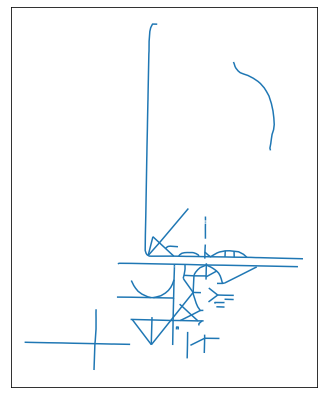

In [4]:
point = 39.51101131560681, -84.7335925887448; #Benton Hall Coordinates
tags = {
    'surface' : ['concrete','Asphalt']
}


G = ox.geometries_from_point(point,tags,250)

f, ax = plt.subplots(figsize=(7, 7))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
G.plot(ax=ax);

# G returns gdf (GeoDataFrame)
G

# f returns plot made from G 
# TODO: convert matplot into oxmnx graph plot.
#f 

<h1><b> Tests </b></h1>

<p>The tests below are to configure the properties needed to display the information we are seeking.<br>Below are some variables needed to run the tests.</p>

In [5]:
point = 39.51101131560681, -84.7335925887448; 

### Test 1: using the create graph method to plot around an address ###

2021-11-05 16:14:49 Pausing 1 seconds before making HTTP GET request
2021-11-05 16:14:50 Get https://nominatim.openstreetmap.org/search?format=json&limit=1&dedupe=0&q=Benton+Hall with timeout=180
2021-11-05 16:14:50 Downloaded 0.5kB from nominatim.openstreetmap.org
2021-11-05 16:14:50 Saved response to cache file "cache/b2214aeabbe5e2d7948b85ad7e07ee6dbcdeb244.json"
2021-11-05 16:14:50 Geocoded "Benton Hall" to (39.51074355, -84.73364497785923)
2021-11-05 16:14:50 Created bbox 150 m from (39.51074355, -84.73364497785923): 39.51209253050324,39.50939456949676,-84.73189647333736,-84.7353934823811
2021-11-05 16:14:50 Projected GeoDataFrame to +proj=utm +zone=16 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-11-05 16:14:50 Projected GeoDataFrame to epsg:4326
2021-11-05 16:14:50 Projected GeoDataFrame to +proj=utm +zone=16 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-11-05 16:14:50 Projected GeoDataFrame to epsg:4326
2021-11-05 16:14:50 Requesting data within polygo

/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


2021-11-05 16:14:51 Pausing 0 seconds before making HTTP POST request
2021-11-05 16:14:51 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22highway%22%5D%5B%22area%22%21~%22yes%22%5D%5B%22access%22%21~%22private%22%5D%5B%22highway%22%21~%22abandoned%7Cbus_guideway%7Cconstruction%7Ccycleway%7Cmotor%7Cplanned%7Cplatform%7Cproposed%7Craceway%22%5D%5B%22foot%22%21~%22no%22%5D%5B%22service%22%21~%22private%22%5D%28poly%3A%2739.509394+-84.741207+39.512092+-84.741207+39.512534+-84.741179+39.512971+-84.741096+39.513400+-84.740957+39.513816+-84.740765+39.514215+-84.740521+39.514594+-84.740228+39.514949+-84.739888+39.515277+-84.739505+39.515573+-84.739082+39.515837+-84.738624+39.516064+-84.738134+39.516253+-84.737618+39.516402+-84.737081+39.516509+-84.736528+39.516574+-84.735963+39.516596+-84.735394+39.516596+-84.731896+39.516574+-84.731326+39.516509+-84.730762+39.516402+-84.730209+39.516253+-84.729671+39.516064+-84.729156+39.515837+-84.728666+39

/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


2021-11-05 16:14:53 Identified 3714 geometries inside polygon
2021-11-05 16:14:54 Removed 429 nodes outside polygon
2021-11-05 16:14:54 Truncated graph by polygon
2021-11-05 16:14:54 Begin topologically simplifying the graph...
2021-11-05 16:14:54 Identified 1817 edge endpoints
2021-11-05 16:14:54 Simplified graph: 3714 to 1817 nodes, 8972 to 5178 edges
2021-11-05 16:14:54 Identifying all nodes that lie outside the polygon...
2021-11-05 16:14:55 Created nodes GeoDataFrame from graph
2021-11-05 16:14:55 Created r-tree spatial index for 1817 geometries


/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


2021-11-05 16:14:55 Identified 170 geometries inside polygon
2021-11-05 16:14:55 Removed 1647 nodes outside polygon
2021-11-05 16:14:55 Removed 2 isolated nodes
2021-11-05 16:14:55 Got largest weakly connected component (162 of 168 total nodes)
2021-11-05 16:14:55 Truncated graph by polygon
2021-11-05 16:14:55 Counted undirected street segments incident on each node
2021-11-05 16:14:55 graph_from_polygon returned graph with 162 nodes and 458 edges
2021-11-05 16:14:55 graph_from_bbox returned graph with 162 nodes and 458 edges
2021-11-05 16:14:55 graph_from_point returned graph with 162 nodes and 458 edges
2021-11-05 16:14:55 graph_from_address returned graph with 162 nodes and 458 edges
2021-11-05 16:14:55 Begin plotting the graph...
2021-11-05 16:14:55 Created edges GeoDataFrame from graph
2021-11-05 16:14:55 Created nodes GeoDataFrame from graph


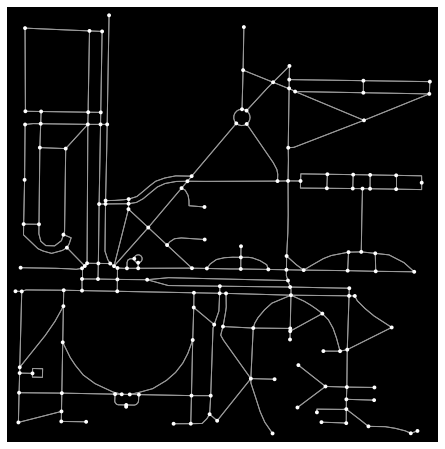

2021-11-05 16:14:56 Finished plotting the graph


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
#G = create_graph("Oxford, OH", 2000, "walk")
Graph = create_graph("Benton Hall", 150, "walk");
ox.plot_graph(Graph, bgcolor='black')

### Test 2: creating a graph from a point and modifying different perameters passed into plot_graph ###

2021-11-05 16:14:56 Created bbox 250 m from (39.51101131560681, -84.7335925887448): 39.51325961644554,39.50876301476808,-84.7306784033106,-84.73650677417899
2021-11-05 16:14:56 Projected GeoDataFrame to +proj=utm +zone=16 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-11-05 16:14:56 Projected GeoDataFrame to epsg:4326
2021-11-05 16:14:56 Projected GeoDataFrame to +proj=utm +zone=16 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-11-05 16:14:56 Projected GeoDataFrame to epsg:4326
2021-11-05 16:14:56 Requesting data within polygon from API in 1 request(s)
2021-11-05 16:14:56 Resolved overpass-api.de to 178.63.48.217


/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


2021-11-05 16:14:56 Pausing 0 seconds before making HTTP POST request
2021-11-05 16:14:56 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22surface%22~%22concrete%22%5D%28poly%3A%2739.508763+-84.742320+39.513259+-84.742321+39.513701+-84.742293+39.514138+-84.742209+39.514567+-84.742070+39.514983+-84.741878+39.515382+-84.741634+39.515761+-84.741341+39.516116+-84.741001+39.516444+-84.740618+39.516741+-84.740195+39.517004+-84.739737+39.517231+-84.739248+39.517420+-84.738732+39.517569+-84.738195+39.517676+-84.737641+39.517741+-84.737077+39.517763+-84.736507+39.517763+-84.730678+39.517741+-84.730108+39.517676+-84.729544+39.517569+-84.728991+39.517420+-84.728453+39.517231+-84.727938+39.517004+-84.727448+39.516740+-84.726990+39.516444+-84.726567+39.516116+-84.726184+39.515761+-84.725844+39.515382+-84.725551+39.514983+-84.725307+39.514567+-84.725115+39.514138+-84.724976+39.513701+-84.724893+39.513259+-84.724865+39.508763+-84.724865+39.508321+-84

/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


2021-11-05 16:14:57 Created r-tree spatial index for 153 geometries
2021-11-05 16:14:57 Identified 84 geometries inside polygon
2021-11-05 16:14:57 Removed 69 nodes outside polygon
2021-11-05 16:14:57 Truncated graph by polygon
2021-11-05 16:14:57 Counted undirected street segments incident on each node
2021-11-05 16:14:57 graph_from_polygon returned graph with 84 nodes and 174 edges
2021-11-05 16:14:57 graph_from_bbox returned graph with 84 nodes and 174 edges
2021-11-05 16:14:57 graph_from_point returned graph with 84 nodes and 174 edges
2021-11-05 16:14:57 Begin plotting the graph...
2021-11-05 16:14:57 Created edges GeoDataFrame from graph
2021-11-05 16:14:58 Created nodes GeoDataFrame from graph


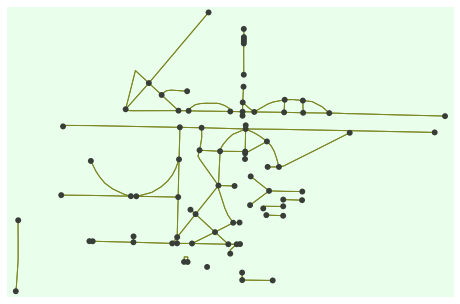

2021-11-05 16:14:58 Finished plotting the graph


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [7]:
#Graph = create_graph(point, 150, "walk", "points")
F = ox.graph_from_point(point, 250, network_type = 'walk', retain_all = True, clean_periphery = True, custom_filter = '["surface"~"concrete"]')
ox.plot_graph(F, bgcolor='#e9ffeb', node_color = '#383d37', edge_color = '#7d8724', node_size = 35)

### Test 3: using test 2's graph and converting it into gdf and back into a graph plot ###

2021-11-05 16:14:58 Created nodes GeoDataFrame from graph
2021-11-05 16:14:58 Created edges GeoDataFrame from graph
2021-11-05 16:14:58 Created graph from node/edge GeoDataFrames
2021-11-05 16:14:58 Begin plotting the graph...
2021-11-05 16:14:58 Created edges GeoDataFrame from graph
2021-11-05 16:14:58 Created nodes GeoDataFrame from graph


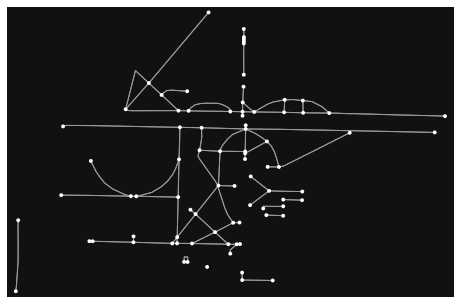

2021-11-05 16:14:58 Finished plotting the graph


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [8]:
nodes, edges = ox.graph_to_gdfs(F)
ox.plot_graph(ox.graph_from_gdfs(nodes,edges))

### Test 3.5: same as test 3, however the starting graph was grabbed from an address and had no filter string perameter ### 

2021-11-05 16:14:58 Created nodes GeoDataFrame from graph
2021-11-05 16:14:58 Created edges GeoDataFrame from graph
2021-11-05 16:14:58 Created graph from node/edge GeoDataFrames
2021-11-05 16:14:58 Begin plotting the graph...
2021-11-05 16:14:58 Created edges GeoDataFrame from graph
2021-11-05 16:14:59 Created nodes GeoDataFrame from graph


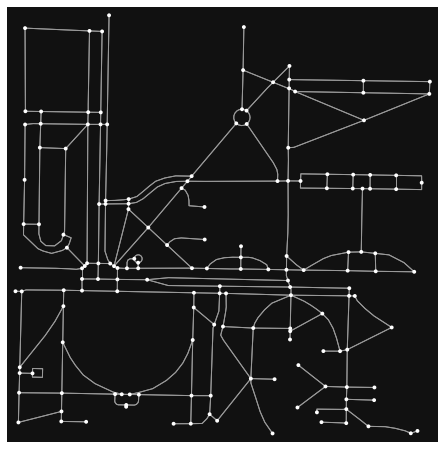

2021-11-05 16:14:59 Finished plotting the graph

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
nodes, edges = ox.graph_to_gdfs(Graph)
ox.plot_graph(ox.graph_from_gdfs(nodes,edges))

### Test 4: creates graph around Benton, selects a node at benton to start, and pathes to Armstrong.

In [10]:
Map = ox.graph_from_point(point,1000)

start = point #predefined as benton hall
end = 39.50802747138995, -84.73306176971025 #location of armstrong studnet center

# Throws errors claiming this method is depricated but supports no further documentation on the topic
start_node = ox.get_nearest_node(Map,start)
end_node = ox.get_nearest_node(Map,end)

# Newer version? Not quite sure what the parameters are though. Output doesn't look accurate.
#start_node = ox.nearest_nodes(Map,start[0],start[1])
#end_node = ox.nearest_nodes(Map,end[0],end[1])

route = nx.shortest_path(Map, start_node, end_node, weight = 'length')
route

2021-11-05 16:14:59 Created bbox 1000 m from (39.51101131560681, -84.7335925887448): 39.520004518961734,39.50201811225188,-84.72193584700803,-84.74524933048157
2021-11-05 16:14:59 Projected GeoDataFrame to +proj=utm +zone=16 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-11-05 16:14:59 Projected GeoDataFrame to epsg:4326
2021-11-05 16:14:59 Projected GeoDataFrame to +proj=utm +zone=16 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2021-11-05 16:14:59 Projected GeoDataFrame to epsg:4326
2021-11-05 16:14:59 Requesting data within polygon from API in 1 request(s)
2021-11-05 16:14:59 Resolved overpass-api.de to 178.63.48.217


/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


2021-11-05 16:14:59 Pausing 0 seconds before making HTTP POST request
2021-11-05 16:14:59 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22highway%22%5D%5B%22area%22%21~%22yes%22%5D%5B%22highway%22%21~%22abandoned%7Cconstruction%7Cplanned%7Cplatform%7Cproposed%7Craceway%22%5D%28poly%3A%2739.502018+-84.751062+39.520004+-84.751064+39.520446+-84.751036+39.520883+-84.750952+39.521312+-84.750813+39.521728+-84.750621+39.522127+-84.750377+39.522506+-84.750084+39.522861+-84.749744+39.523188+-84.749361+39.523485+-84.748938+39.523749+-84.748480+39.523976+-84.747991+39.524165+-84.747475+39.524314+-84.746938+39.524421+-84.746384+39.524486+-84.745820+39.524508+-84.745250+39.524508+-84.721935+39.524486+-84.721365+39.524421+-84.720801+39.524314+-84.720247+39.524165+-84.719710+39.523976+-84.719194+39.523748+-84.718705+39.523485+-84.718247+39.523188+-84.717824+39.522861+-84.717441+39.522506+-84.717101+39.522127+-84.716808+39.521728+-84.716564+39.521311

/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


2021-11-05 16:15:04 Removed 625 nodes outside polygon
2021-11-05 16:15:04 Truncated graph by polygon
2021-11-05 16:15:04 Begin topologically simplifying the graph...
2021-11-05 16:15:05 Identified 3970 edge endpoints
2021-11-05 16:15:06 Simplified graph: 9370 to 3970 nodes, 21613 to 11076 edges
2021-11-05 16:15:06 Identifying all nodes that lie outside the polygon...
2021-11-05 16:15:06 Created nodes GeoDataFrame from graph
2021-11-05 16:15:06 Created r-tree spatial index for 3970 geometries
2021-11-05 16:15:06 Identified 2972 geometries inside polygon


/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


2021-11-05 16:15:07 Removed 998 nodes outside polygon
2021-11-05 16:15:07 Removed 8 isolated nodes
2021-11-05 16:15:07 Got largest weakly connected component (2945 of 2964 total nodes)
2021-11-05 16:15:07 Truncated graph by polygon
2021-11-05 16:15:07 Counted undirected street segments incident on each node
2021-11-05 16:15:07 graph_from_polygon returned graph with 2945 nodes and 8262 edges
2021-11-05 16:15:07 graph_from_bbox returned graph with 2945 nodes and 8262 edges
2021-11-05 16:15:07 graph_from_point returned graph with 2945 nodes and 8262 edges
2021-11-05 16:15:07 Created nodes GeoDataFrame from graph


/srv/conda/envs/notebook/lib/python3.7/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


ImportError: scikit-learn must be installed to search an unprojected graph